In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/tensorflow

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/tensorflow


In [0]:
#dataset
N = 2000
X = np.random.random((N,2)) * 6-3 #uniform data generation from -3 to 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], Y)

In [0]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(128, input_shape=(2,), activation="relu"),
                                   tf.keras.layers.Dense(1)
                                    
])


In [14]:
opt = tf.keras.optimizers.Adam(0.01) #adamoptimizer withlearning rate 0.01
model.compile(
    optimizer=opt,
    loss="mse"
)
r = model.fit(X,Y,epochs=100)

Train on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 0s 159us/sample - loss: 0.9702
Epoch 2/100
2000/2000 [==============================] - 0s 43us/sample - loss: 0.9321
Epoch 3/100
2000/2000 [==============================] - 0s 41us/sample - loss: 0.8617
Epoch 4/100
2000/2000 [==============================] - 0s 44us/sample - loss: 0.7377
Epoch 5/100
2000/2000 [==============================] - 0s 45us/sample - loss: 0.6322
Epoch 6/100
2000/2000 [==============================] - 0s 42us/sample - loss: 0.5570
Epoch 7/100
2000/2000 [==============================] - 0s 43us/sample - loss: 0.5512
Epoch 8/100
2000/2000 [==============================] - 0s 45us/sample - loss: 0.5012
Epoch 9/100
2000/2000 [==============================] - 0s 44us/sample - loss: 0.5596
Epoch 10/100
2000/2000 [==============================] - 0s 44us/sample - loss: 0.5230
Epoch 11/100
2000/2000 [==============================] - 0s 41us/sample - loss: 0.4695
Epoch 12/100
2000/

In [17]:
#plot loss
plt.plot(r.history["loss"], label="loss")

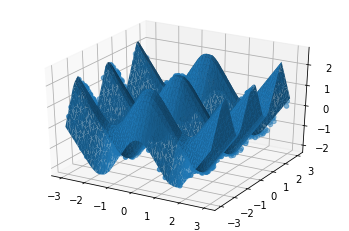

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

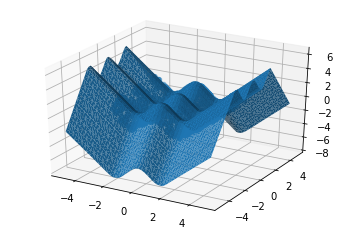

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()